In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
df = pd.read_csv("C:/Users/daksh/Downloads/Iris.csv")  

In [14]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [15]:
# Prepare features and labels
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [16]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [18]:
# Predict
y_pred = model.predict(X_test)

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [20]:
# Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')


In [21]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.98
Error Rate: 0.02
Precision: 0.98
Recall: 0.98


In [22]:

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [23]:
# Calculating TP, FP, FN, TN manually (for each class)
print("\nClass-wise TP, FP, FN, TN:")
for idx, label in enumerate(model.classes_):
    TP = cm[idx, idx]
    FP = cm[:, idx].sum() - TP
    FN = cm[idx, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    print(f"\nClass: {label}")
    print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")



Class-wise TP, FP, FN, TN:

Class: Iris-setosa
TP: 19, FP: 0, FN: 0, TN: 26

Class: Iris-versicolor
TP: 12, FP: 0, FN: 1, TN: 32

Class: Iris-virginica
TP: 13, FP: 1, FN: 0, TN: 31


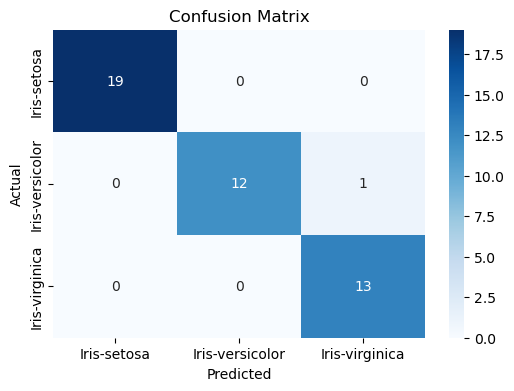

In [24]:
# Visualization of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()